## "Nossa taxa de inadimplência é de 35%. 
## Você acha que com o uso das suas técnicas, conseguimos baixar este índice para pelo menos, 25%?"

Crie um modelos de machine learning e tente chegar a um índice de inadimplência aproximado, de 25%. Você pode fazer em R ou Python. Descreva algoritmos e técnicas utilizadas, bem como o índice alcançado.

In [72]:
import numpy as np
import pandas as pd
import seaborn as sbs
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
####
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression #



In [73]:
Relatorio = pd.read_json('./relatorios/relatorio.json')
Numero_do_teste = Relatorio['Numero_do_teste']

KeyError: 'Numero_do_teste'

In [ ]:
Bkp = pd.read_csv('./dados/Credito.csv',encoding="ISO-8859-1",sep=';')
Credito = Bkp

In [74]:
Bkp['USO_CREDITO'].head()

0     6
1    48
2    12
3    42
4    24
Name: USO_CREDITO, dtype: int64

In [75]:
#['CHEQUEESPECIAL', 'HISTORICO_CREDITO', 'PROPOSITO','BALANCO_MEDIO_CREDITO', 'EMPREGADO', 'LOCAL','ESTADOCIVIL', 'OUTRASFUNCOES', 'RESIDENCIADESDE', 'TIPOSBENS','OUTROSPLANOSPGTO', 'RESIDENCIA', 'CREDITOSEXISTENTES','EMPREGO', 'TRABAESTRANGEIRO', 'CLASSE']
#Bkp.columns.values

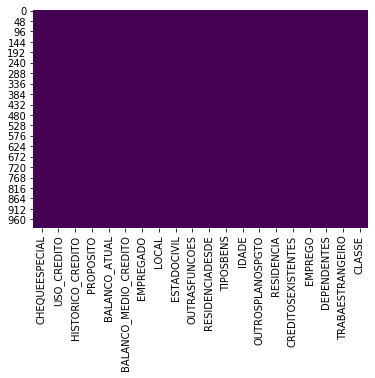

In [76]:
sbs.heatmap(Bkp.isnull(),cmap='viridis',cbar=False)
#nenum dado faltante

In [91]:
Bkp.groupby('CLASSE').count()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO
CLASSE,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


## Pre processamencount

## Dummys

In [92]:
#Label_ENCODE
labelencoder = LabelEncoder()
Credito.iloc[:, 0] = labelencoder.fit_transform(Credito.iloc[:, 0])
Credito.iloc[:, 2] = labelencoder.fit_transform(Credito.iloc[:, 2])
Credito.iloc[:, 3] = labelencoder.fit_transform(Credito.iloc[:, 3])
Credito.iloc[:, 5] = labelencoder.fit_transform(Credito.iloc[:, 5])
Credito.iloc[:, 6] = labelencoder.fit_transform(Credito.iloc[:, 6])
Credito.iloc[:, 8] = labelencoder.fit_transform(Credito.iloc[:, 8])
Credito.iloc[:, 9] = labelencoder.fit_transform(Credito.iloc[:, 9])
Credito.iloc[:, 11] = labelencoder.fit_transform(Credito.iloc[:, 11])
Credito.iloc[:, 13] = labelencoder.fit_transform(Credito.iloc[:, 13])
Credito.iloc[:, 14] = labelencoder.fit_transform(Credito.iloc[:, 14])
Credito.iloc[:, 16] = labelencoder.fit_transform(Credito.iloc[:, 16])
Credito.iloc[:, 18] = labelencoder.fit_transform(Credito.iloc[:, 18])
Credito.iloc[:,19] = labelencoder.fit_transform(Credito.iloc[:, 19])
Credito.iloc[:,19] = labelencoder.fit_transform(Credito.iloc[:, 19])

In [79]:
def dummyficando(dataFrame,label):
    Dummy = dataFrame.loc[:,[label]].groupby(label).count()
    tamanho = len(Dummy)
    colunas = Dummy.index.values
    Dummy[1] = range(0,tamanho)
    enc = OneHotEncoder(categories='auto')
    enc.fit(Dummy)
    dummy_fic = enc.transform(Dummy).toarray()
    dummy_fic
    dum2 = pd.DataFrame(dummy_fic[:,1:],index=colunas.reshape(tamanho),columns=colunas[1:])    
    return dum2

In [80]:
def preparar_teste(Dtf_to_Dummy,labels_to_dummys,labels_to_delete,y_label):
    labelencoder = LabelEncoder()
    Dtf_to_Dummy = Dtf_to_Dummy.drop(labels_to_delete,axis=1)
    if int == type(y_label):
        Credito.iloc[:,[0]]=1
        Dtf_to_Dummy.iloc[:,[y_label]] = labelencoder.fit_transform(Dtf_to_Dummy.iloc[:,[y_label]])
    else:
        Dtf_to_Dummy[y_label] = labelencoder.fit_transform(Dtf_to_Dummy[y_label])
    
#    print('\n-------Labels Dummyficadas:\n----------')
    for i in range(0,len(labels_to_dummys)):
        
        Dtf_to_Dummy = Dtf_to_Dummy.join(dummyficando(Dtf_to_Dummy,labels_to_dummys[i]),on=labels_to_dummys[i],lsuffix='_'+labels_to_dummys[i],rsuffix='_-'+labels_to_dummys[i]+'-')
        Dtf_to_Dummy.drop(labels_to_dummys[i],inplace=True,axis=1)
#        print(labels_to_dummys[i])
#    print('\n--------Labels Excluidas:\n----------')
#    print(labels_excuir)
    return Dtf_to_Dummy

In [81]:
Credito.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,1,6,1,0,1169,4,3,4,3,2,4,0,67,1,2,2,1,1,1,0
1,0,48,2,0,5951,2,0,2,0,2,2,0,22,1,2,1,1,1,1,1
2,3,12,1,4,2096,2,1,2,3,2,3,0,49,1,2,1,2,2,1,0
3,1,42,2,5,7882,2,1,2,3,1,4,3,45,1,1,1,1,2,1,0
4,1,24,0,2,4870,2,0,3,3,2,4,2,53,1,1,2,1,2,1,1


/home/loribao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/loribao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


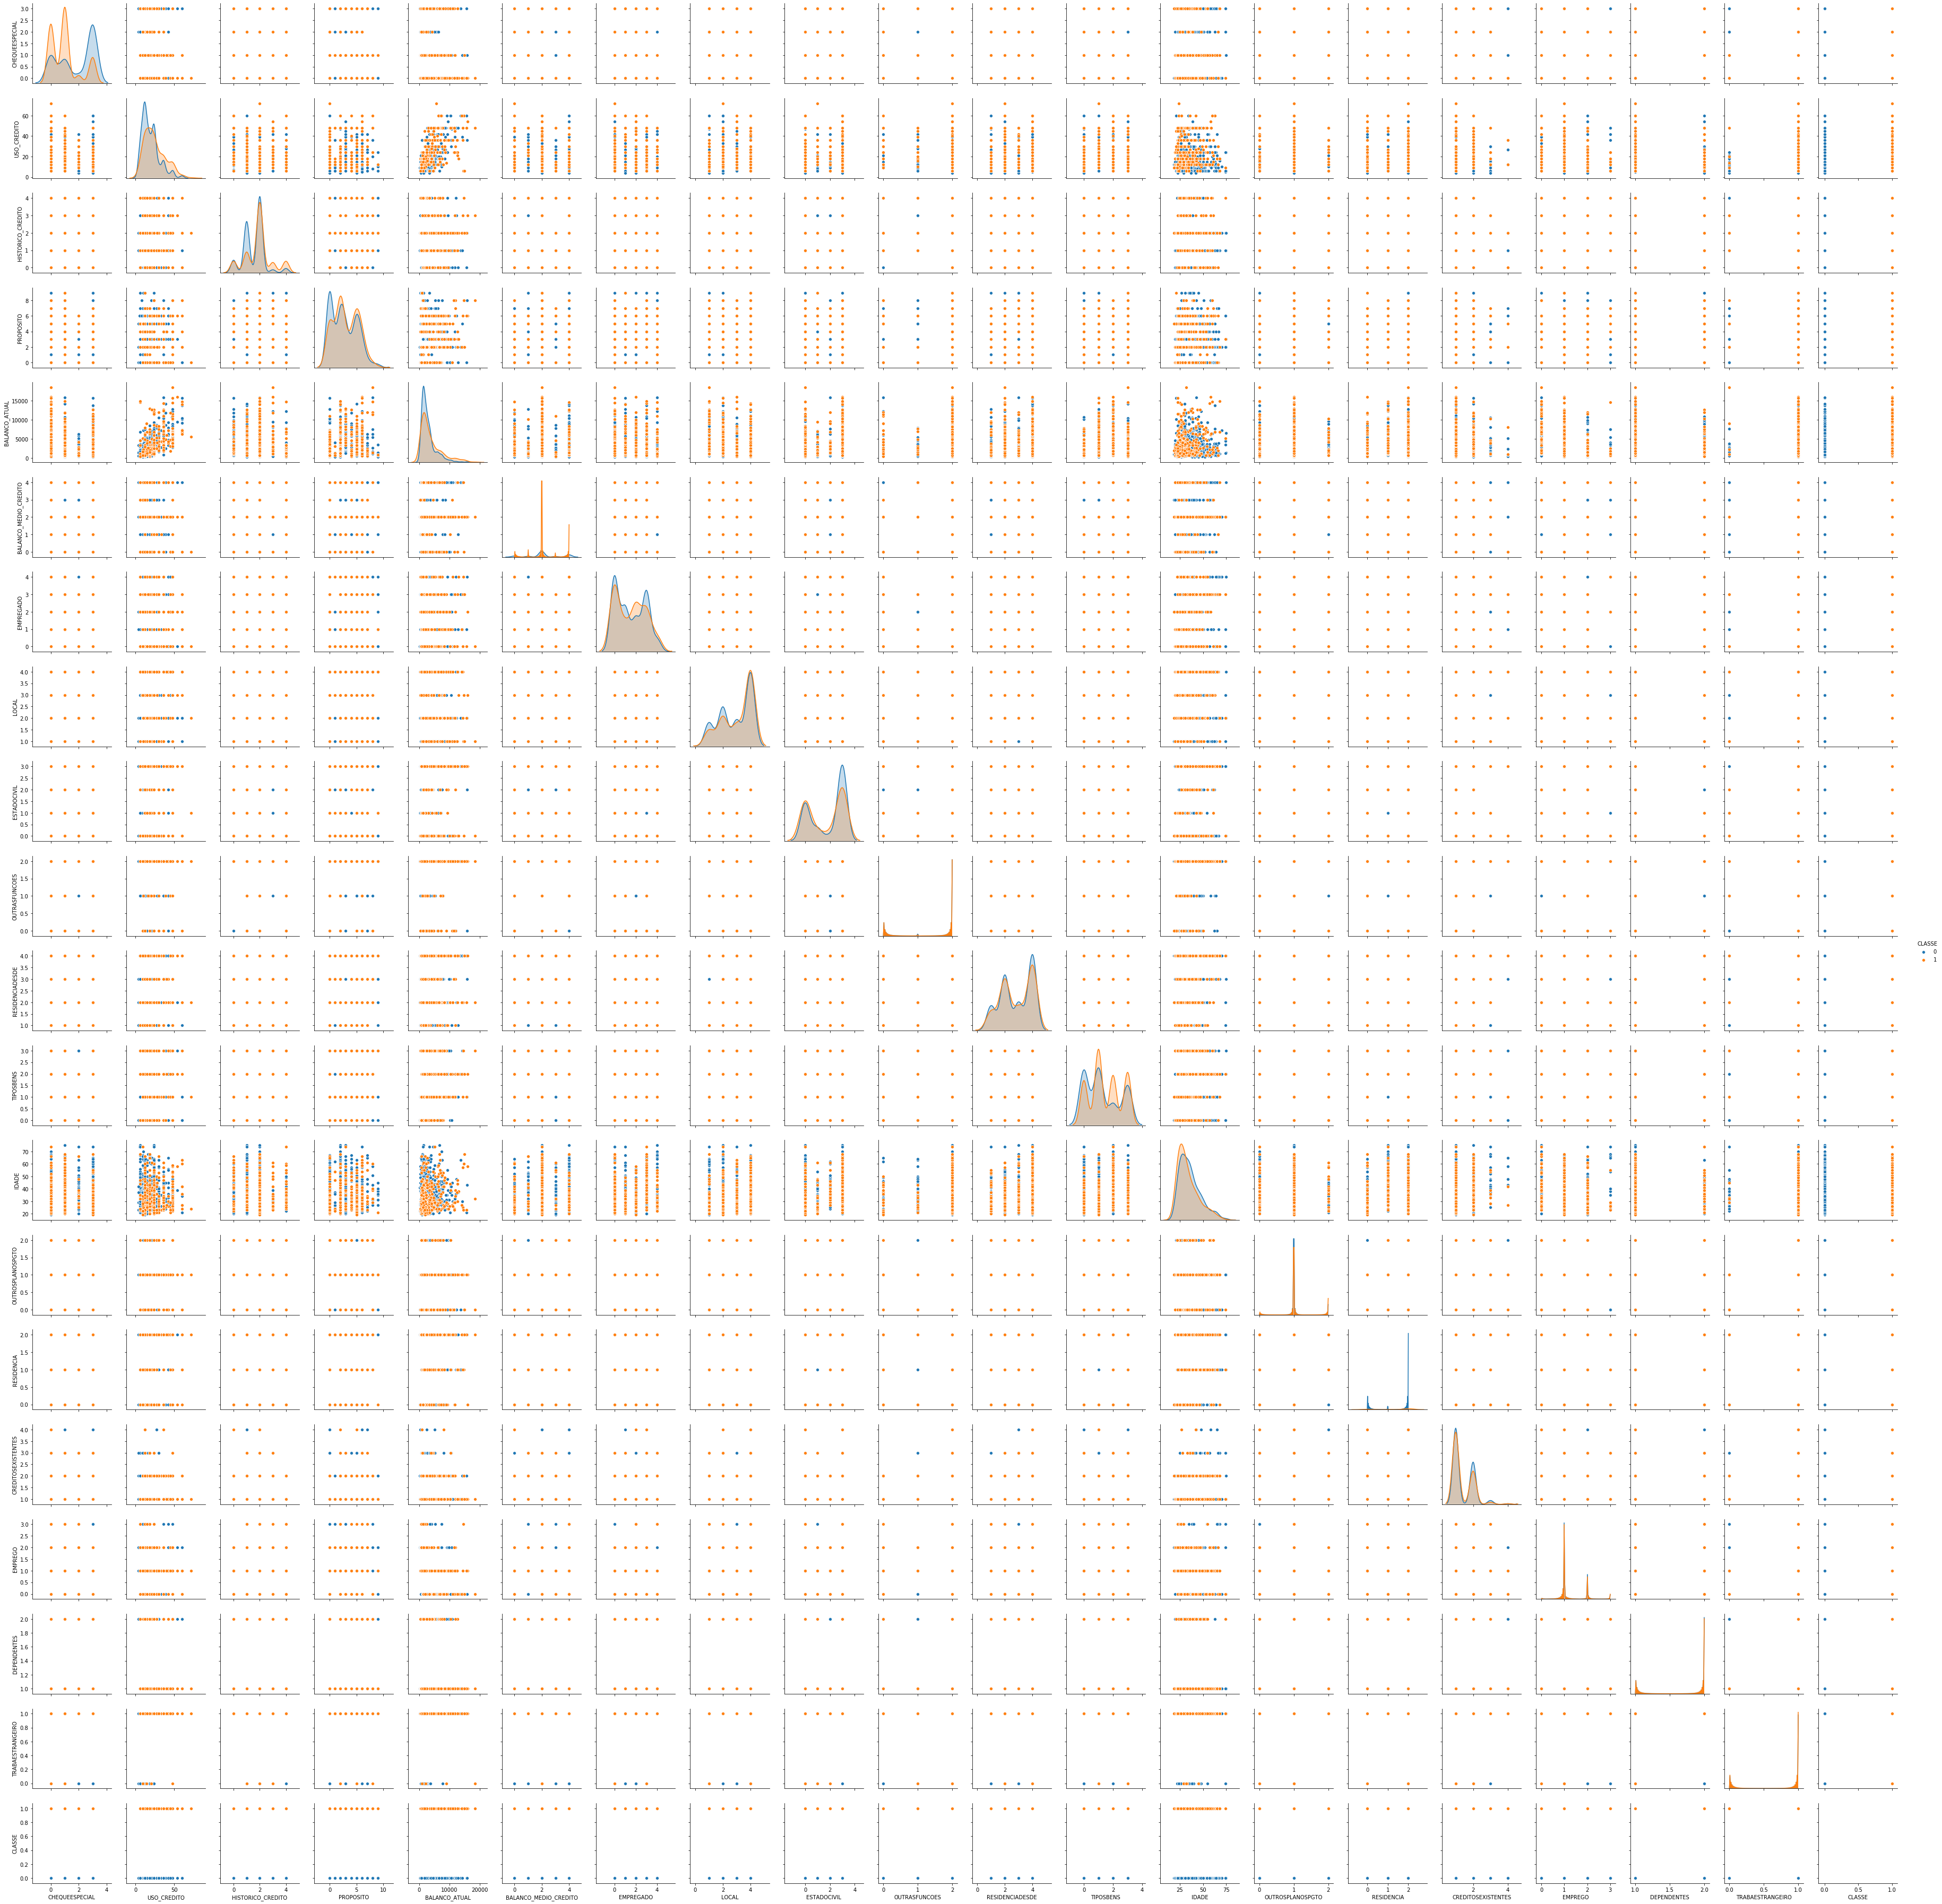

In [82]:
sbs.pairplot(Credito,hue="CLASSE")

In [93]:
Credito.corr().loc['CLASSE',:]

CHEQUEESPECIAL          -0.302406
USO_CREDITO              0.214927
HISTORICO_CREDITO        0.184599
PROPOSITO                0.073236
BALANCO_ATUAL            0.154739
BALANCO_MEDIO_CREDITO   -0.103133
EMPREGADO                0.008932
LOCAL                    0.072404
ESTADOCIVIL             -0.076625
OUTRASFUNCOES           -0.028441
RESIDENCIADESDE          0.002967
TIPOSBENS                0.094035
IDADE                   -0.091127
OUTROSPLANOSPGTO        -0.053862
RESIDENCIA              -0.123815
CREDITOSEXISTENTES      -0.045732
EMPREGO                 -0.032735
DEPENDENTES             -0.003015
TRABAESTRANGEIRO         0.082079
CLASSE                   1.000000
Name: CLASSE, dtype: float64

In [84]:
((Credito.corr().loc['CLASSE',:] > -0.01) & (Credito.corr().loc['CLASSE',:] < 0))

CHEQUEESPECIAL           False
USO_CREDITO              False
HISTORICO_CREDITO        False
PROPOSITO                False
BALANCO_ATUAL            False
BALANCO_MEDIO_CREDITO    False
EMPREGADO                False
LOCAL                    False
ESTADOCIVIL              False
OUTRASFUNCOES            False
RESIDENCIADESDE          False
TIPOSBENS                False
IDADE                    False
OUTROSPLANOSPGTO         False
RESIDENCIA               False
CREDITOSEXISTENTES       False
EMPREGO                  False
DEPENDENTES               True
TRABAESTRANGEIRO         False
CLASSE                   False
Name: CLASSE, dtype: bool

In [85]:
((Credito.corr().loc['CLASSE',:] < 0.01) & (Credito.corr().loc['CLASSE',:] > 0))

CHEQUEESPECIAL           False
USO_CREDITO              False
HISTORICO_CREDITO        False
PROPOSITO                False
BALANCO_ATUAL            False
BALANCO_MEDIO_CREDITO    False
EMPREGADO                 True
LOCAL                    False
ESTADOCIVIL              False
OUTRASFUNCOES            False
RESIDENCIADESDE           True
TIPOSBENS                False
IDADE                    False
OUTROSPLANOSPGTO         False
RESIDENCIA               False
CREDITOSEXISTENTES       False
EMPREGO                  False
DEPENDENTES              False
TRABAESTRANGEIRO         False
CLASSE                   False
Name: CLASSE, dtype: bool

In [96]:
labels_to_dummys_ = ['CHEQUEESPECIAL', 'HISTORICO_CREDITO', 'PROPOSITO','BALANCO_MEDIO_CREDITO', 'EMPREGADO','ESTADOCIVIL', 'OUTRASFUNCOES', 'RESIDENCIADESDE', 'TIPOSBENS','OUTROSPLANOSPGTO', 'RESIDENCIA', 'CREDITOSEXISTENTES','EMPREGO', 'TRABAESTRANGEIRO', 'CLASSE']
labels_to_delete_ = ['LOCAL']
df = preparar_teste(Dtf_to_Dummy=Credito,
                    labels_to_dummys=labels_to_dummys_,
                    labels_to_delete=labels_to_delete_,
                    y_label='CLASSE')
random_state_ = 4
test_size_ = 0.3
x_treino, x_teste, y_treino, y_teste = train_test_split( df.drop('CLASSE',axis=1),
                                                         df['CLASSE'],
                                                         test_size=test_size_,
                                                         random_state=random_state_
                                                       )

KeyError: "['CLASSE'] not found in axis"

In [ ]:
regr = LinearRegression() # cria o modelo
regr.fit(x_treino, y_treino)
regr_predict = regr.predict(x_teste)
sbs.distplot(y_teste-regr_predict)

In [ ]:
1-accuracy_score(y_teste,np.around(np.abs(regr_predict)))

In [ ]:
regr.coef_[1]

In [ ]:
x_treino.head(1).iloc[:,[2-1]]#.groupby('BALANCO_ATUAL').count()

In [ ]:
    tree = RandomForestClassifier(n_estimators = 100)
    tree.fit(x_treino, y_treino)        
    1- accuracy_score(y_teste, tree.predict(x_teste))

## Algoritmos de testes

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df.drop('CLASSE',axis=1),
                                                        df['CLASSE'],
                                                        test_size=test_size_,
                                                        random_state=random_state_
                                                       )

numero_do_teste = numero_do_teste +1
for i in range(0,25):
    lm = LogisticRegression(solver ="newton-cg")
    lm.fit(x_treino,y_treino)
    lm_predict = lm.predict(x_teste)  
    ################################
    tree_c = DecisionTreeClassifier()
    tree_c.fit(x_treino, y_treino)
    predict_tree_c = tree_c.predict(x_teste)
    acerto_tree_c = accuracy_score(y_teste, predict_tree_c)
    #################################
    tree = RandomForestClassifier(n_estimators = 100)
    tree.fit(x_treino, y_treino)
    predict_tree = tree.predict(x_teste)
    acerto_tree = accuracy_score(y_teste, predict_tree)
    ##################################
    svc = SVC(gamma=0.001,C=100,kernel='rbf',probability=True)
    svc.fit(x_treino,y_treino)
    predict_svc = svc.predict(x_teste)
    acerto_svc = accuracy_score(y_teste,predict_svc)
    ##################################
    grid_dicionario = {'C':[0.01,0.1,1,10,100],'gamma':[1000,100,10,1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
    grid_search = GridSearchCV(SVC(),grid_dicionario)
    grid_search.fit(x_treino,y_treino)
    print('GridSearchCV beste_params: ',grid_search.best_params_)
    predict_grid = grid_search.predict(x_teste)
    #################################################
    k_m = KMeans(n_clusters=2,random_state=0,max_iter=300)
    k_m.fit(x_treino)
    k_m_predict = k_m.predict(x_teste)
    ################################################
    gNBayes = GaussianNB()
    gNBayes.fit(x_treino,y_treino)
    gNBayes_predict = gNBayes.predict(x_teste)
    
    Relatorio = Relatorio.append([{
                   '00-LogisticRegression':1-accuracy_score(y_teste,lm_predict),
                   '01-DecisionTreeClassifier':1-accuracy_score(y_teste, predict_tree_c),
                   '02-RandomForestClassifier':1-accuracy_score(y_teste, predict_tree),
                   '03-SVC':1-accuracy_score(y_teste,predict_svc),
                   'GridSearchCV':1-accuracy_score(predict_grid,y_teste),
                   '04-KMeans':1-accuracy_score(y_teste,k_m_predict),
                   '05-GaussianNB':1-accuracy_score(y_teste,gNBayes_predict),
                   '16-Dummy': len(labels_to_dummys_),
                   '17-Dummy Campos':labels_to_dummys_,
                   '18-Excuidos':labels_to_delete_,
                   '20-random_state': random_state_,
                   '21-test_size_': test_size_,
                   'Numero_do_teste': numero_do_teste
                  }],sort=True)



In [ ]:
#Relatorio = pd.DataFrame()
#Relatorio.head()

In [ ]:
Relatorio[Relatorio['Numero_do_teste']==numero_do_teste].describe()

In [ ]:
Relatorio

In [ ]:
Relatorio.to_json('./relatorios/relatorio.json')